In [21]:
import scipy
import os
import warnings
import numpy as np
from model import DGN
from scipy.io import loadmat
import matplotlib.pyplot as plt
import torch.nn
import contextlib
import sys


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Arial', 'Liberation Serif']

#### 1. inspect

#### 2. data preprocessing

In [22]:
def normalize_matrix(connectivity_matrix):
    np.fill_diagonal(connectivity_matrix, 0)
    connectivity_matrix[np.logical_or(np.isinf(connectivity_matrix), np.isnan(connectivity_matrix))] = 0
    connectivity_matrix = connectivity_matrix.astype(float)
    
    return connectivity_matrix

In [23]:
connectivity_matrices_ad = []

for i in range(1, 42):
    mat = scipy.io.loadmat(f'data_ad_lmci_L/data_ad_lmci_L/AD_LH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_ad.append(connectivity_matrix)

connectivity_matrices_ad = np.stack(connectivity_matrices_ad)

connectivity_matrices_lmci = []

for i in range(42, 78):
    mat = scipy.io.loadmat(f'data_ad_lmci_L/data_ad_lmci_L/LMCI_LH/subject{i}.mat')
    connectivity_matrix = mat['A'][:, :, :]
    connectivity_matrix = [normalize_matrix(mat) for mat in connectivity_matrix]
    connectivity_matrices_lmci.append(connectivity_matrix)

connectivity_matrices_lmci = np.stack(connectivity_matrices_lmci)


In [24]:
warnings.filterwarnings("ignore", category=UserWarning)

#### 3. train DGN for ASD

In [25]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 41

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.001

#Name of the model
model_name = "ADHD_THREE_LOSS_TRAIN"

#dimension of embeddings output by the first GDL layer (for each ROI)
CONV1 = 8
#dimension of embeddings output by the second GDL layer (for each ROI)
CONV2 = 8
#dimension of embeddings output by the third GDL layer (for each ROI)
CONV3 = 8

lambda1 = 200
lambda2 = 50
patience = 3

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_ad
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda1" : lambda1,
        "lambda2" : lambda2,
        "patience" : patience,
    }

********* FOLD 0 *********


Epoch: 0  |  cbt loss : 59.19 | reservoir loss : 0.0898 | bio loss : 0.87837 | total loss: 121.08 | median cbt mc 9.26 | Time Elapsed: 6.21 | 
Epoch: 10  |  cbt loss : 39.70 | reservoir loss : 0.0892 | bio loss : 0.79965 | total loss: 97.52 | median cbt mc 9.27 | Time Elapsed: 12.09 | 
Epoch: 20  |  cbt loss : 28.86 | reservoir loss : 0.0890 | bio loss : 0.77429 | total loss: 85.37 | median cbt mc 9.27 | Time Elapsed: 14.84 | 
Epoch: 30  |  cbt loss : 22.07 | reservoir loss : 0.0890 | bio loss : 0.83837 | total loss: 81.78 | median cbt mc 9.27 | Time Elapsed: 12.69 | 
Epoch: 40  |  cbt loss : 18.00 | reservoir loss : 0.0889 | bio loss : 0.73557 | total loss: 72.56 | median cbt mc 9.35 | Time Elapsed: 16.25 | 
Epoch: 50  |  cbt loss : 15.48 | reservoir loss : 0.0889 | bio loss : 0.44975 | total loss: 55.75 | median cbt mc 10.25 | Time Elapsed: 14.58 | 
Epoch: 60  |  cbt loss : 13.97 | reservoir loss : 0.0889 | bio loss : 0.41642 | total loss: 52.58 | median cbt mc 10.26 | Time Elapsed: 

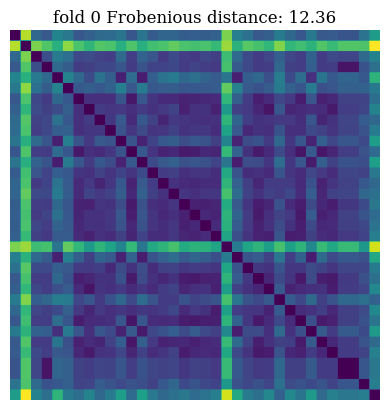

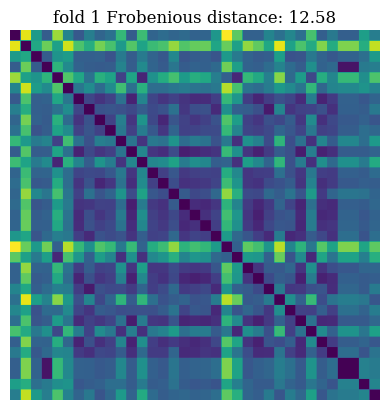

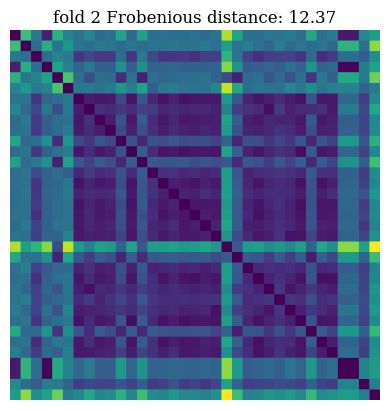

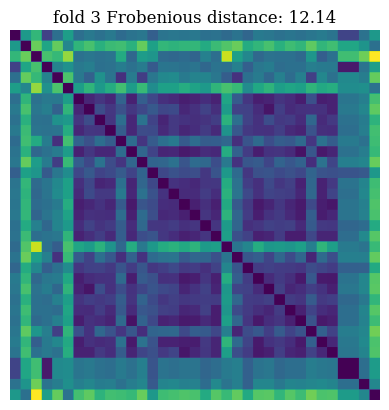

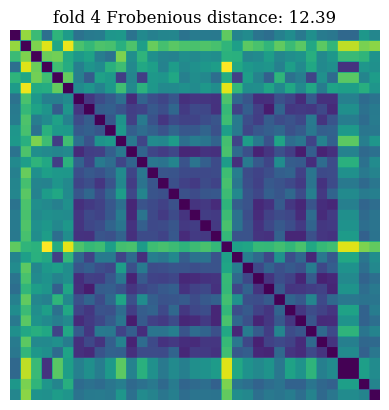

In [26]:
# lambda2 = 50
np.random.seed(35813)
torch.manual_seed(35813)
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])

In [33]:
Dataset = "E" 

#Number of simulated subjects (overwriten if Dataset = "E") 
N_Subjects = 36

#Number of nodes for simulated brain networks (overwriten if Dataset = "E") 
N_Nodes = 35

#Number of brain views (overwriten if Dataset = "E")
N_views = 4

#Number of training epochs
N_max_epochs = 500

#Apply early stopping True/False
early_stop =  True

#Random subset size for SNL function  
random_sample_size = 10

#Number of cross validation folds
n_folds = 5

#Learning Rate for Adam optimizer
lr = 0.001

#Name of the model
model_name = "LMCI_THREE_LOSS_TRAIN"

#dimension of embeddings output by the first GDL layer (for each ROI)
CONV1 = 8
#dimension of embeddings output by the second GDL layer (for each ROI)
CONV2 = 8
#dimension of embeddings output by the third GDL layer (for each ROI)
CONV3 = 8

lambda1 = 200
lambda2 = 10
patience = 3

#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#
#                 Below is not to be modified manually                       #
#----------------------------------------------------------------------------#
#----------------------------------------------------------------------------#

import helper

if Dataset.lower() not in ["e", "E", "s", "S"]:
    raise ValueError("Dataset options are E or S.")
    
if (Dataset.lower() == "e"):
    X = connectivity_matrices_lmci
    N_Subjects = X.shape[0]
    N_Nodes = X.shape[1]
    N_views = X.shape[3]
else:
    X = helper.create_better_simulated(N_Subjects, N_Nodes) if N_views == 4 else helper.simulate_dataset(N_Subjects, N_Nodes, N_views)


CONFIG = {
        "X": X,
        "N_ROIs":  X.shape[1],
        "N_views":  X.shape[3],
        "N_max_epochs": N_max_epochs,
        "n_folds": n_folds,
        "random_sample_size": random_sample_size,
        "early_stop": early_stop,
        "model_name": model_name
    }

MODEL_PARAMS = {
        "N_ROIs": N_Nodes,
        "learning_rate" : lr,
        "n_attr": X.shape[3],
        "Linear1" : {"in": N_views, "out": CONV1},
        "conv1": {"in" : 1, "out": CONV1},
        
        "Linear2" : {"in": N_views, "out": CONV1*CONV2},
        "conv2": {"in" : CONV1, "out": CONV2},
        
        "Linear3" : {"in": N_views, "out": CONV2*CONV3},
        "conv3": {"in" : CONV2, "out": CONV3},
        "lambda1" : lambda1,
        "lambda2" : lambda2,
        "patience" : patience,
    }

********* FOLD 0 *********
Epoch: 0  |  cbt loss : 71.03 | reservoir loss : 0.0932 | bio loss : 0.76210 | total loss: 97.29 | median cbt mc 9.27 | Time Elapsed: 3.66 | 
Epoch: 10  |  cbt loss : 49.75 | reservoir loss : 0.0924 | bio loss : 0.74280 | total loss: 75.65 | median cbt mc 9.34 | Time Elapsed: 7.12 | 
Epoch: 20  |  cbt loss : 35.32 | reservoir loss : 0.0921 | bio loss : 0.44204 | total loss: 58.16 | median cbt mc 10.23 | Time Elapsed: 7.37 | 
Epoch: 30  |  cbt loss : 26.07 | reservoir loss : 0.0920 | bio loss : 0.40266 | total loss: 48.50 | median cbt mc 10.25 | Time Elapsed: 7.78 | 
Epoch: 40  |  cbt loss : 21.46 | reservoir loss : 0.0920 | bio loss : 0.41401 | total loss: 44.00 | median cbt mc 10.26 | Time Elapsed: 8.40 | 
Epoch: 50  |  cbt loss : 17.97 | reservoir loss : 0.0920 | bio loss : 0.42058 | total loss: 40.57 | median cbt mc 10.26 | Time Elapsed: 9.79 | 
Epoch: 60  |  cbt loss : 14.92 | reservoir loss : 0.0920 | bio loss : 0.43720 | total loss: 37.68 | median cbt m

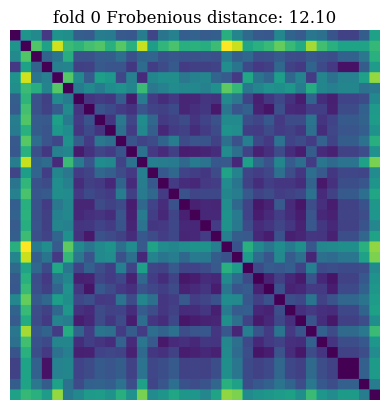

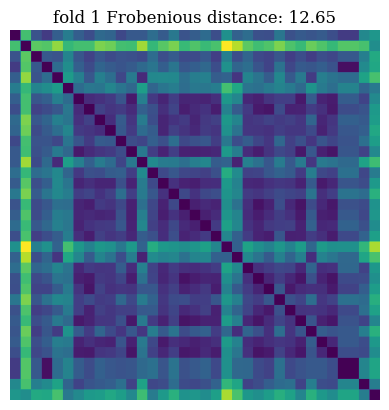

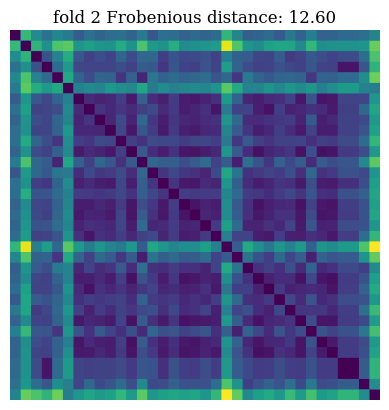

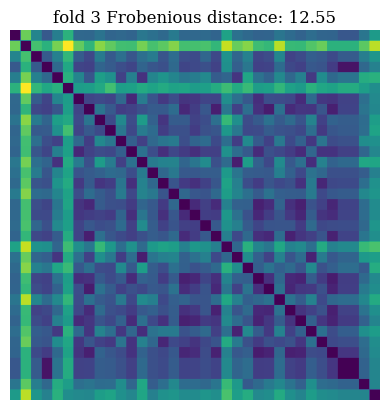

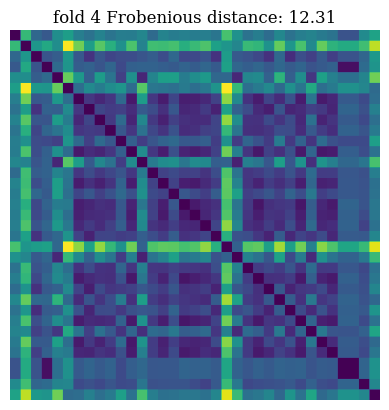

In [34]:
models = DGN.train_model(
                CONFIG["X"],
                model_params=MODEL_PARAMS,
                n_max_epochs=CONFIG["N_max_epochs"],
                n_folds=CONFIG["n_folds"],
                random_sample_size=CONFIG["random_sample_size"],
                early_stop=CONFIG["early_stop"],
                model_name=CONFIG["model_name"])